/home/dell/miniconda3/envs/vqpf/lib/python3.10/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


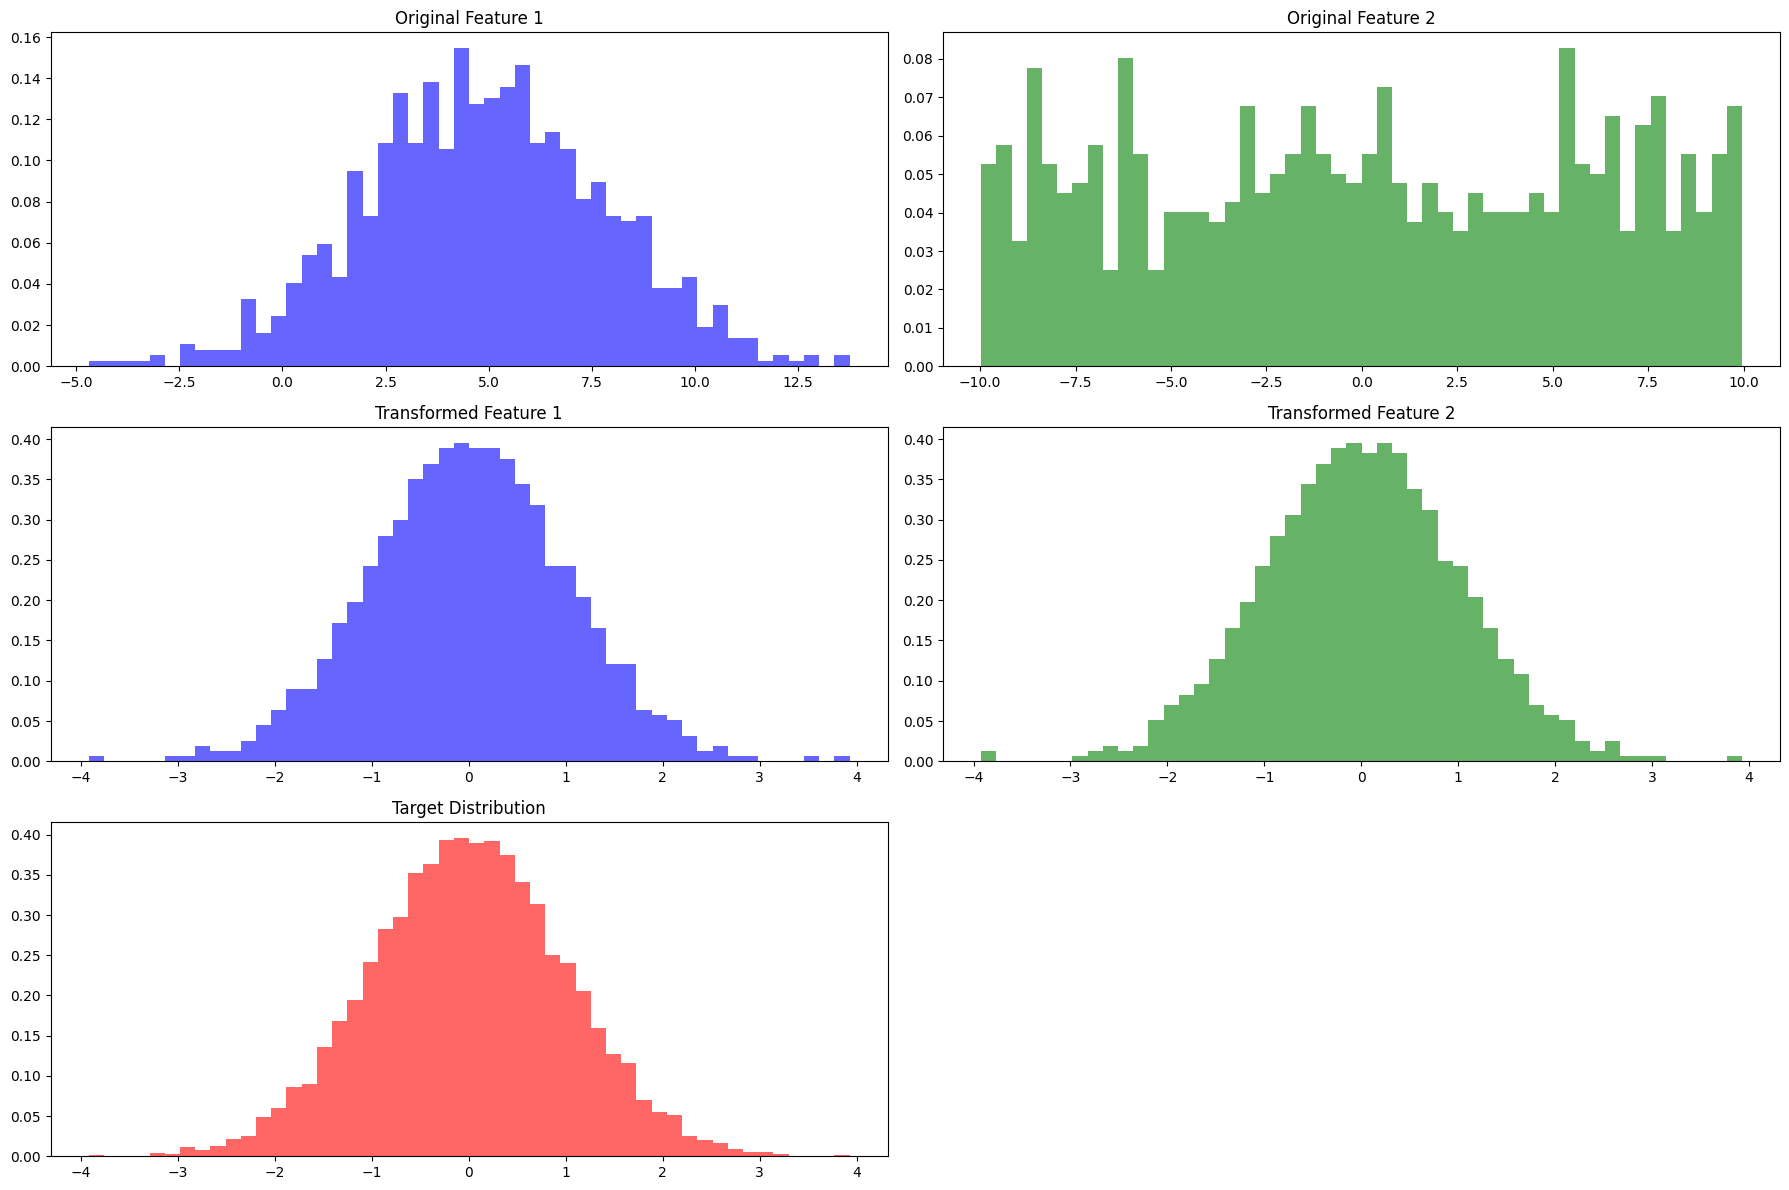

In [ ]:
from UniPAN.dataset.UniNBUData import UniDistribution
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# target_distribution = np.random.exponential(size=10_000)
# target_distribution = np.random.uniform(size=10_000)
target_distribution = np.random.normal(size=10_000)

X = np.column_stack([
    np.random.normal(loc=5, scale=3, size=1000),
    np.random.uniform(low=-10, high=10, size=1000)
])

ud = UniDistribution(
    output_distribution='custom',
    target_samples=target_distribution,
    n_quantiles=500,
    subsample=2000,
    random_state=42
)

ud.fit(X)
X_trans = ud.transform(X)


plt.figure(figsize=(18, 12))
bins = 50
alpha = 0.6

plt.subplot(3, 2, 1)
plt.hist(X[:, 0], bins=bins, alpha=alpha, color='blue', density=True)
plt.title('Original Feature 1')
plt.subplot(3, 2, 2)
plt.hist(X[:, 1], bins=bins, alpha=alpha, color='green', density=True)
plt.title('Original Feature 2')

plt.subplot(3, 2, 3)
plt.hist(X_trans[:, 0], bins=bins, alpha=alpha, color='blue', density=True)
plt.title('Transformed Feature 1')
plt.subplot(3, 2, 4)
plt.hist(X_trans[:, 1], bins=bins, alpha=alpha, color='green', density=True)
plt.title('Transformed Feature 2')

plt.subplot(3, 2, 5)
plt.hist(target_distribution, bins=bins, alpha=alpha, color='red', density=True)
plt.title('Target Distribution')
plt.tight_layout()
plt.show()
